<a href="https://colab.research.google.com/github/Ashraf-Saleheen/Data-Science-Project-4-GoldPricePredMod/blob/main/GOLDPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics




# Data Collection & Processing

In [ ]:
gold_data = pd.read_csv('/content/GoldPredMod.csv')

###Printing 1st 5 rows

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# No. of columns and rows
gold_data.shape

(2290, 6)

In [ ]:
# Getting basic info

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking no. of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Finding correlation

    1. positive
    2. Negative

In [ ]:
gold_data.corr()

<ipython-input-21-6ce31fdaaad4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_data.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [ ]:
cor= gold_data.corr()

<ipython-input-24-7708de982be8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= gold_data.corr()


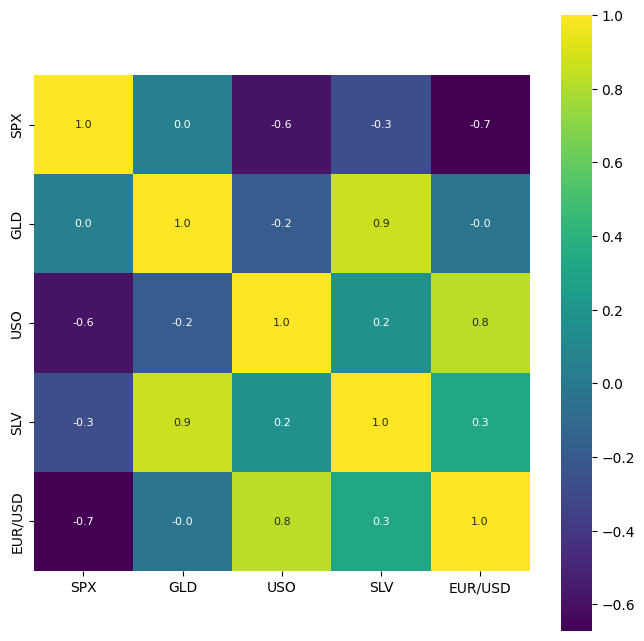

In [ ]:
# Constructing heat map
plt.figure(figsize=(8, 8))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='viridis')
plt.show()

In [ ]:
# Correlation values of GLD
print(cor['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-37-904bef68bd54>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

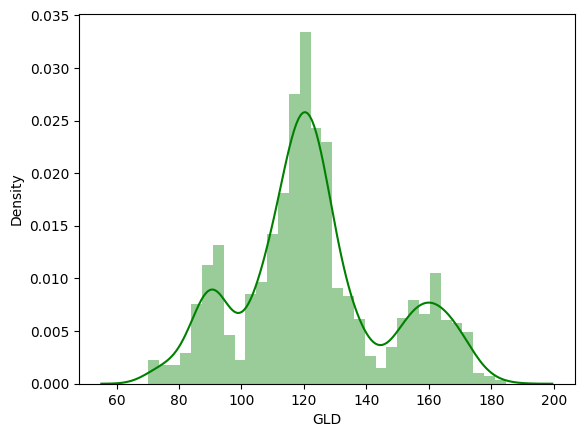

In [ ]:
# Checking distribution
sns.distplot(gold_data['GLD'], color='green')

# Splitting the feature and the target

In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# Splitting into training data and test data

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

# Model Training

In [ ]:
# Using RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=100)

In [ ]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluaiton

In [ ]:
# Prediction on test data

test_data_pred= regressor.predict(X_test)

In [ ]:
print(test_data_pred)

[168.72949996  82.03959976 116.01700098 127.54490116 120.67750136
 154.82539745 150.03279859 126.02270073 117.62309869 126.04540086
 116.46280102 171.5405005  142.21539819 168.14109889 115.2879
 117.31050048 137.93870395 170.31880118 159.52430348 158.57249957
 155.09190009 125.15820017 175.1808999  157.31420381 125.29350061
  93.99549963  77.32559997 120.73050022 119.0377993  167.38749952
  87.88210027 125.07339985  91.14410107 117.64240046 121.20229926
 137.55020055 115.53310125 115.11100072 146.87079917 107.29300097
 104.54910264  87.24659809 126.4692004  117.94469968 153.17659867
 119.58069986 108.55089988 108.25289803  93.3343005  126.93259848
  74.89270034 113.53909919 121.5303003  111.38789944 118.99739901
 120.98389905 159.99699944 168.45640181 146.98039717  85.75709858
  94.30380063  86.75089843  90.51670028 118.8880008  126.4631002
 127.62330008 169.81099896 122.28049912 117.38999871  98.58820015
 168.3040009  142.69399908 132.21100259 121.21290204 121.01469954
 119.69350042 1

In [ ]:
# R Squared Value
error_score= metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.9895046505362428


# Compare The Actual Values and The Predicted Values in a plot

In [ ]:
# COnverting the Y_test data into a list to avoid error
Y_test=list(Y_test)

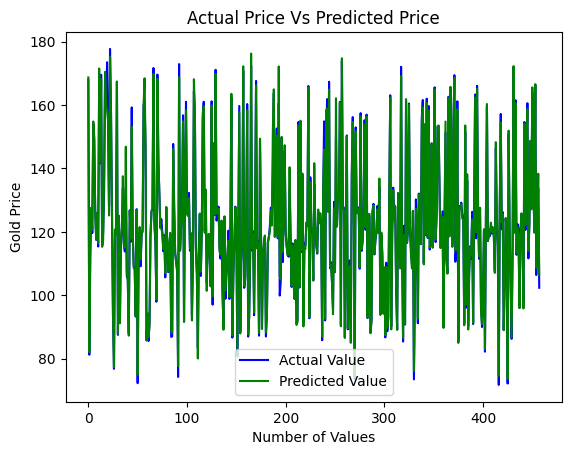

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()